<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 3 (Ensemble)</font></h1>

------------------------------------------------

# Kelompok 3 - PYTN KS 014

Nurul Fajriyah Al Maulidiyah  : PYTN-KS14-001 <br>
Fransisca Mulya Sari          : PYTN-KS14-011 <br>

MSIB Kampus Merdeka Batch 4 (Mei, 2023)

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Cuaca merupakan faktor alam yang sangat mempengaruhi kehidupan manusia. Dalam kehidupan sehari-hari, banyak aktivitas dan tindakan manusia yang bergantung pada faktor dan keadaan cuaca. Seseorang yang akan berpergian membutuhkan informasi cuaca untuk menentukan tujuan perjalanan dan keputusan untuk berangkat pada tujuan tersebut. Mengantisipasi cuaca merupakan kebutuhan manusia untuk dapat melakukan aktivitas dengan baik. Faktor-faktor yang mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, kecepatan angin, dan lainnya. Salah satu fenomena terpenting dalam kehidupan yang dipengaruhi oleh cuaca adalah hujan. 

Hujan merupakan fenomena yang tidak dapat dihindari dimana cuaca merupakan salah satu faktor yang mempengaruhi terjadinya hujan. Oleh karena itu, prakiraan terkait cuaca menjadi sangat penting. Apakah besok akan hujan atau tidak dapat bisa menilai dari klasifikasinya. Metode statistik dan pembelajaran machine learning untuk memprediksi hujan akan dibandingkan dalam project ini. Pada project ini, kami ingin melakukan prediksi pada kejadian hujan di Australia dengan menggunakan metode logistic regression dan SVM. 

Kumpulan data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. **RainTomorrow** adalah variabel target untuk diprediksi. Artinya apakah keesokan harinya hujan, Ya atau Tidak? Kolom ini Ya jika hujan pada hari itu 1 mm atau lebih.


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi keselamatan pasien dari penyakit jantung
- Untuk membuat model ensemble yang dianggap paling sesuai dengan konsep classification sehingga diperoleh akurasi yang tinggi
- Untuk memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan model ensemble

# B. Import Library

In [41]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# C. Data Loading
Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

## C.1. Memanggil dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

**Keterangan dataset:**

Dataset ini berisi 13 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `age` = umur pasien (antara 40-95)
2. `anaemia` = apakah ada pengurangan haemoglobin (Yes:1, No:0)
3. `creatinine_phosphokinase` = level enzim CPK dalam mcg/L
4. `diabetes` = apakah pasien punya riwayat diabetes (Yes:1, No:0)
5. `ejection_fraction` = persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` = apakah pasien punya darah tinggi (Yes:1, No:0)
7. `platelets` = jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` = level serum creatinine di darah dalam mg/dL
9. `serum_sodium` = level serum sodium di darah dalam mEq/L
10. `sex` = apakah pasien pria atau wanita (Male:1, Female:0)
11. `smoking` = apakah pasien merokok (Yes:1, No:0)
12. `time` = waktu dalam hari untuk follow-up
13. `DEATH_EVENT` = apakah pasien sudah meninggal saat waktu follow-up (Yes:1, No:0)

## C.2. Melihat ukuran data

In [3]:
df.shape

(299, 13)

## C.3. Deskriptif Statistik

In [4]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

## C.4. Mengecek info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D. Data Preprocessing
Data pre-processing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan data mining.

## D.1. Pengecekan missing value

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## D.2. Pengecekan data duplikat
Mengecek data duplikat pada keseluruhan data df.

In [7]:
df.duplicated().sum()

0

## D.3. Merubah tipe data pada kolom age
Mencari tahu mengapa kolom age bertipe data float

In [8]:
array = np.array(df['age'])
print(array)

[75.    55.    65.    50.    65.    90.    75.    60.    65.    80.
 75.    62.    45.    50.    49.    82.    87.    45.    70.    48.
 65.    65.    68.    53.    75.    80.    95.    70.    58.    82.
 94.    85.    50.    50.    65.    69.    90.    82.    60.    60.
 70.    50.    70.    72.    60.    50.    51.    60.    80.    57.
 68.    53.    60.    70.    60.    95.    70.    60.    49.    72.
 45.    50.    55.    45.    45.    60.    42.    72.    70.    65.
 41.    58.    85.    65.    69.    60.    70.    42.    75.    55.
 70.    67.    60.    79.    59.    51.    55.    65.    44.    57.
 70.    60.    42.    60.    58.    58.    63.    70.    60.    63.
 65.    75.    80.    42.    60.    72.    55.    45.    63.    45.
 85.    55.    50.    70.    60.    58.    60.    85.    65.    86.
 60.    66.    60.    60.    60.    43.    46.    58.    61.    53.
 53.    60.    46.    63.    81.    75.    65.    68.    62.    50.
 80.    46.    50.    61.    72.    50.    52.  

Ternyata terdapat 2 data pada kolom age yang bernilai 60.667 yang seharusnya dibulatkan. Oleh karena itu, tipe data di konversi menjadi int64.

In [9]:
df['age'] = np.around(array).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


## D.4. Fitur numerik dan categorikal

In [10]:
df_fitur = df.copy()

In [11]:
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
numerik = [value for value in list(df_fitur.columns) if value not in categorical and value != 'DEATH_EVENT']
print('Categorical features :\n', categorical)
print('\nNumerical features :\n', numerik)

Categorical features :
 ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Numerical features :
 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [12]:
swapper={0:'No',1:'Yes'}
for col in categorical:
    if col!='sex':
        for i in range(299):
            df_fitur.loc[i,col]=swapper[df_fitur.loc[i,col]]

In [13]:
for i in range(299):
    if df_fitur.loc[i,'sex']==0:
        df_fitur.loc[i,'sex'] = 'Female'
    else:
        df_fitur.loc[i,'sex'] = 'Male'

Setelah dilakukan data preprocessing maka dapat diketahui bahwa dataset tidak memiliki missing value dan data duplikat.  Tipe data pada kolom age yang awalnya float sudah diubah menjadi int. Dataset memiliki 7 fitur numerik dan 5 fitur kategorikal (tidak termasuk kolom DEATH_EVENT) yang sudah di encode sehingga lebih mudah untuk dilakukan proses selanjutnya. Tampaknya juga tidak ada nilai numerik dengan angka nol yang tidak disengaja.

# E. Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

## E.2. Visualisasi Data
### 1. Bagaimana persentase pasien yang bertahan hidup dan tidak berdasarkan gender?

In [14]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survived = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survived = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not),
         len(female_survived),len(female_not)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival based on Gender", )
fig.show()

**Kesimpulan:** <br>
Berdasarkan visualisasi, dapat dilihat bahwa:
- Pasien dengan jenis kelamin laki-laki yang mampu bertahan hidup memiliki persentase paling tinggi dengan nilai 44.1% dan berjumlah 132 data
- Pasien dengan jenis kelamin perempuan yang mampu bertahan hidup memiliki persentase 23.7% dan berjumlah 71 data
- Pasien dengan jenis kelamin laki-laki yang tidak mampu bertahan hidup memiliki persentase 20.7% dan berjumlah 62 data
- Pasien dengan jenis kelamin perempuan yang tidak mampu bertahan hidup memiliki persentase paling rendah dengan nilai 11.4% dan berjumlah 34 data

### 2. Bagaimana distribusi pada fitur categorikal?

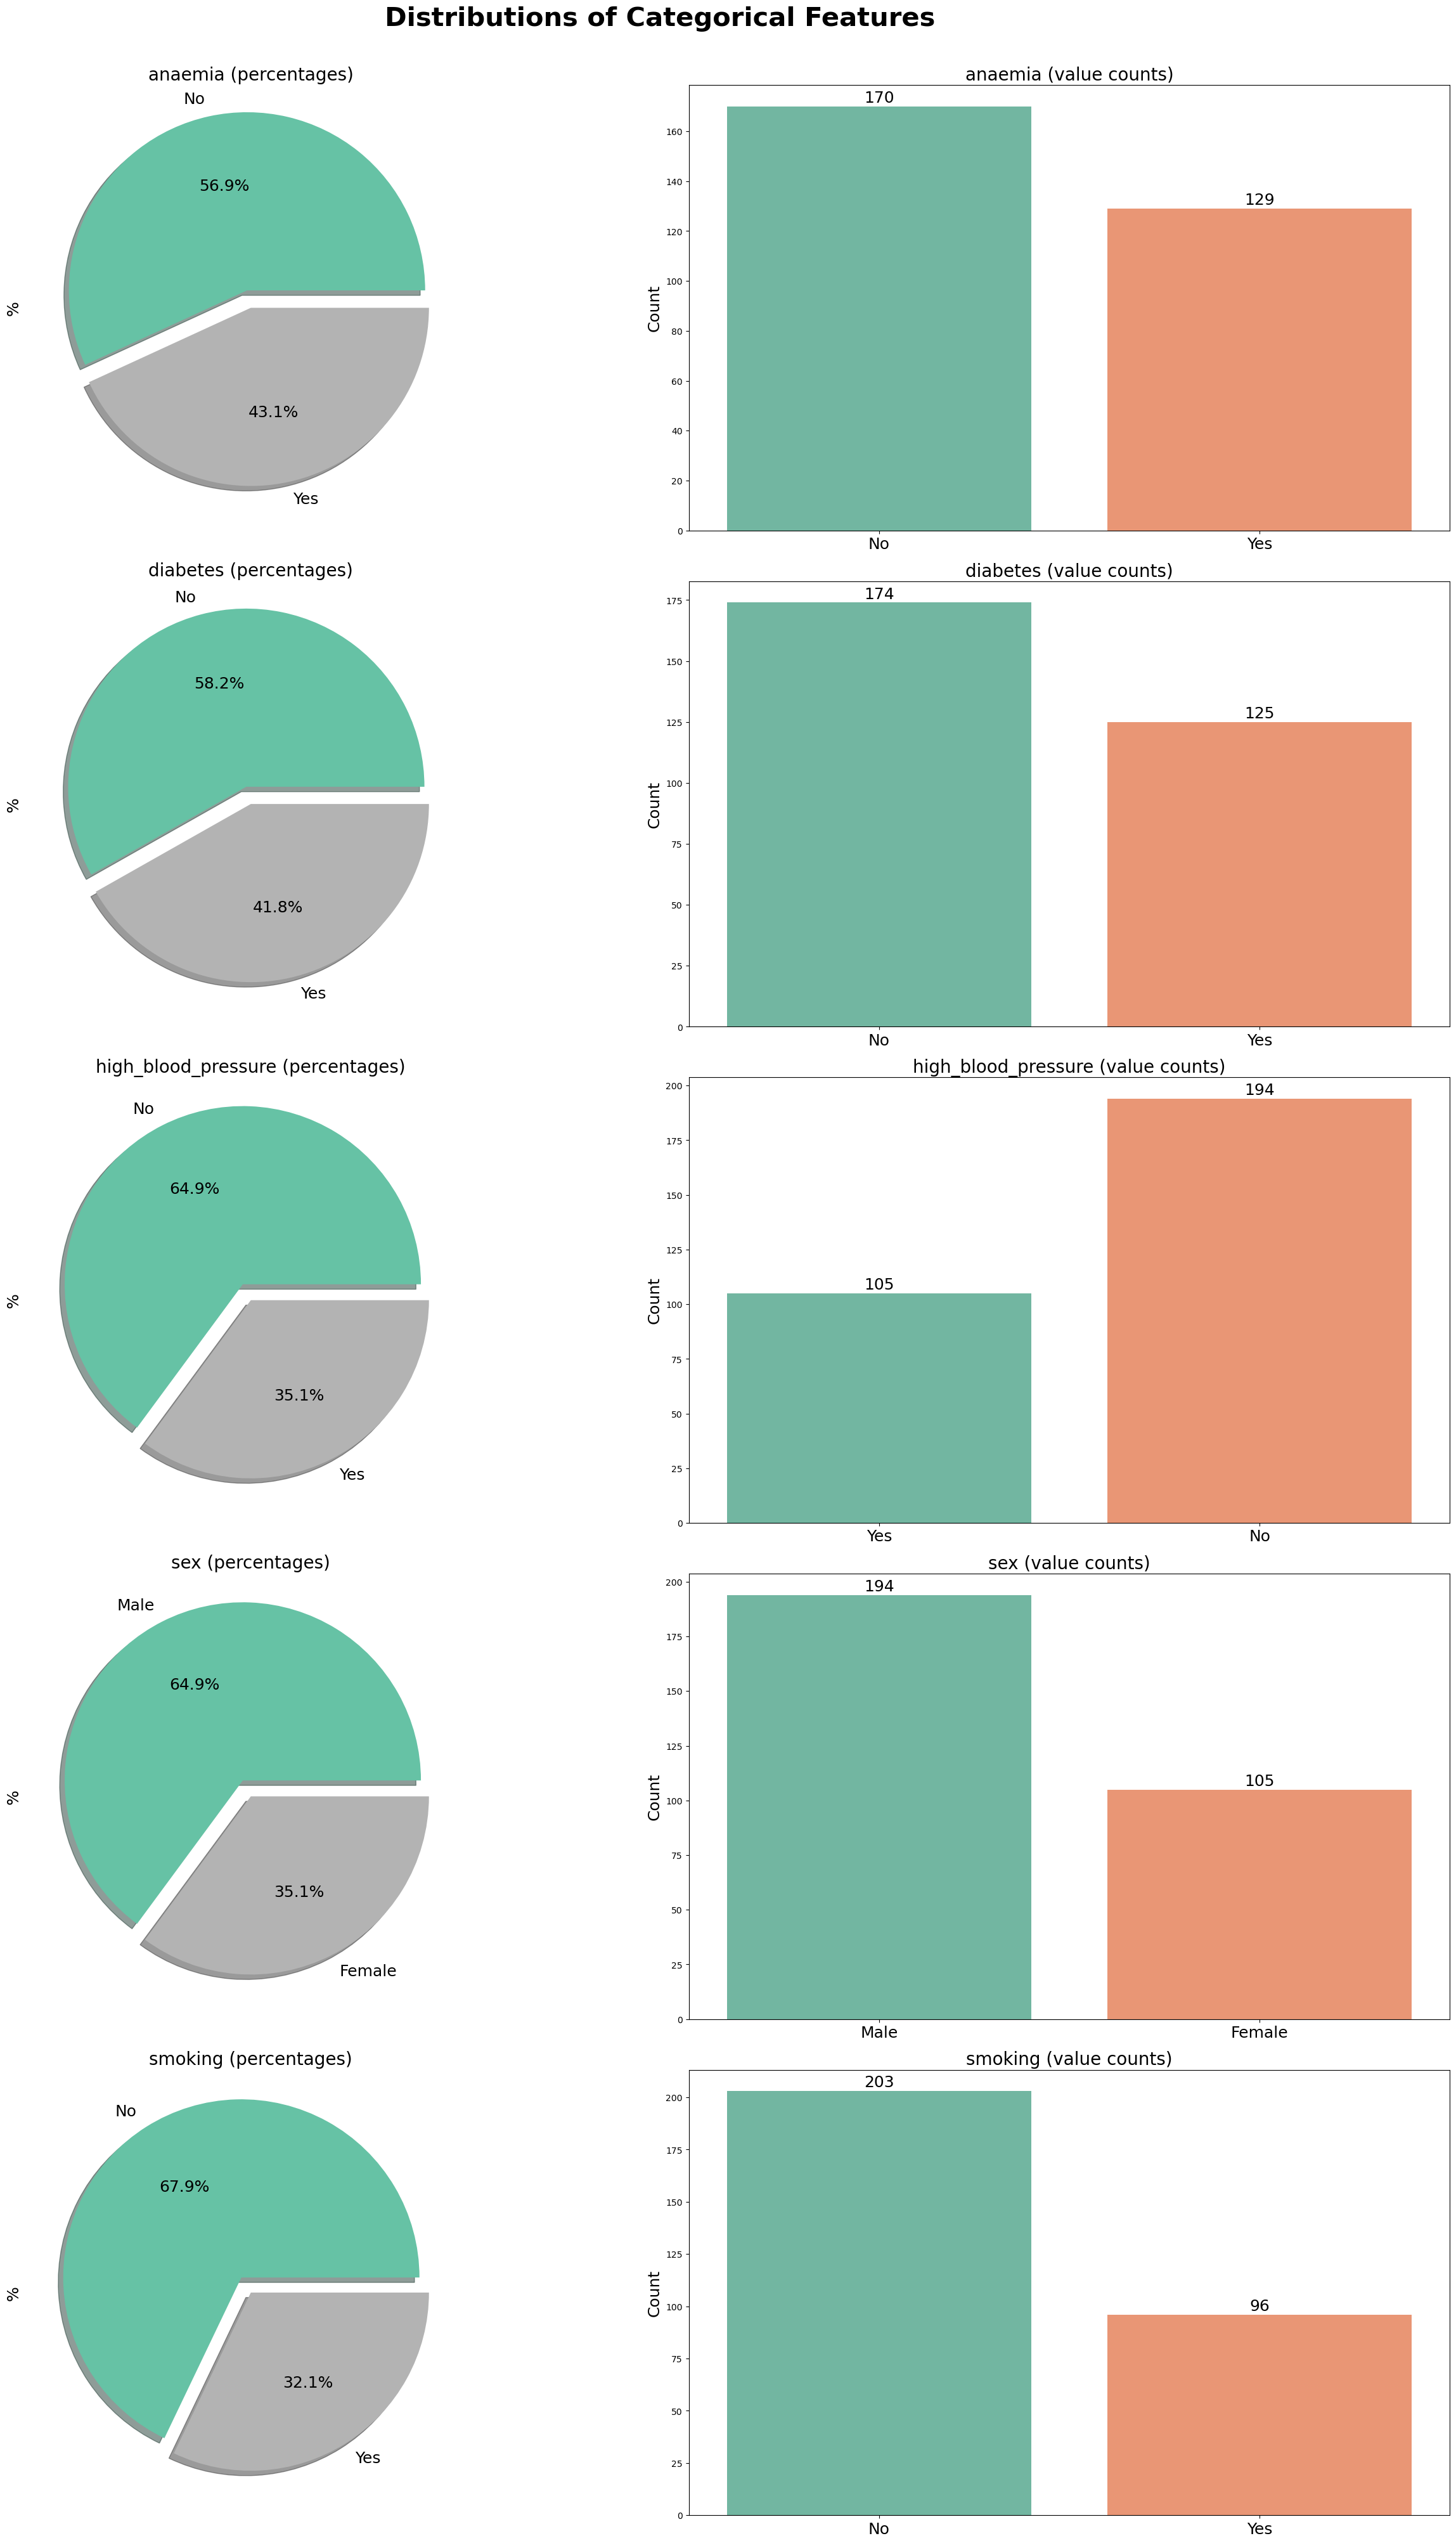

In [15]:
figure, axes = plt.subplots(5, 2, figsize=(25, 40), constrained_layout=True)
figure.suptitle('Distributions of Categorical Features\n', fontsize=30, fontweight='bold')

for i in range(len(categorical)):
    column=categorical[i]
    graph1=df_fitur[column].value_counts().plot.pie(autopct='%1.1f%%', 
                                                    ax=axes[i,0],
                                                    colormap="Set2",
                                                    fontsize=18,
                                                    shadow=True,
                                                    explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=18)
    axes[i,0].set_title(column+' (percentages)', fontsize=20)
    graph2=sns.countplot(x=column,
                         data=df_fitur,
                         palette='Set2',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=18)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=18)
    axes[i,1].set_title(column +' (value counts)', fontsize=20)
    for c in graph2.containers:
        graph2.bar_label(c, fmt='%.0f', label_type='edge', padding=1, fontsize=18)

**Kesimpulan:**<br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- Pasien gagal jantung yang juga menderita anaemia yaitu 43.1% dan berjumlah 129, sedangkan yang tidak menderita anaemia yaitu 56.9% dan berjumlah 170
- Pasien gagal jantung yang juga menderita diabetes yaitu 41.8% dan berjumlah 125, sedangkan yang tidak menderita diabetes yaitu 58.2% dan berjumlah 174 
- Pasien gagal jantung yang memiliki darah tinggi yaitu 35.1% dan berjumlah 105, sedangkan yang tidak memiliki darah tinggi yaitu 64.9% dan berjumlah 194
- Pasien gagal jantung yang berjenis kelamin laki-laki yaitu 64.9% dan berjumlah 194, sedangkan yang berjenis kelamin perempuan yaitu 35.1% dan berjumlah 105
- Pasien gagal jantung yang merokok yaitu 32.1% dan berjumlah 96, sedangkan yang tidak merokok yaitu 67.9% dan berjumlah 203
- Pasien gagal jantung yang meninggal yaitu 32.1% dan berjumlah 96, sedangkan yang tidak meninggal yaitu 67.9% dan berjumlah 203

### 3. Bagaimana distribusi pada fitur numerik?

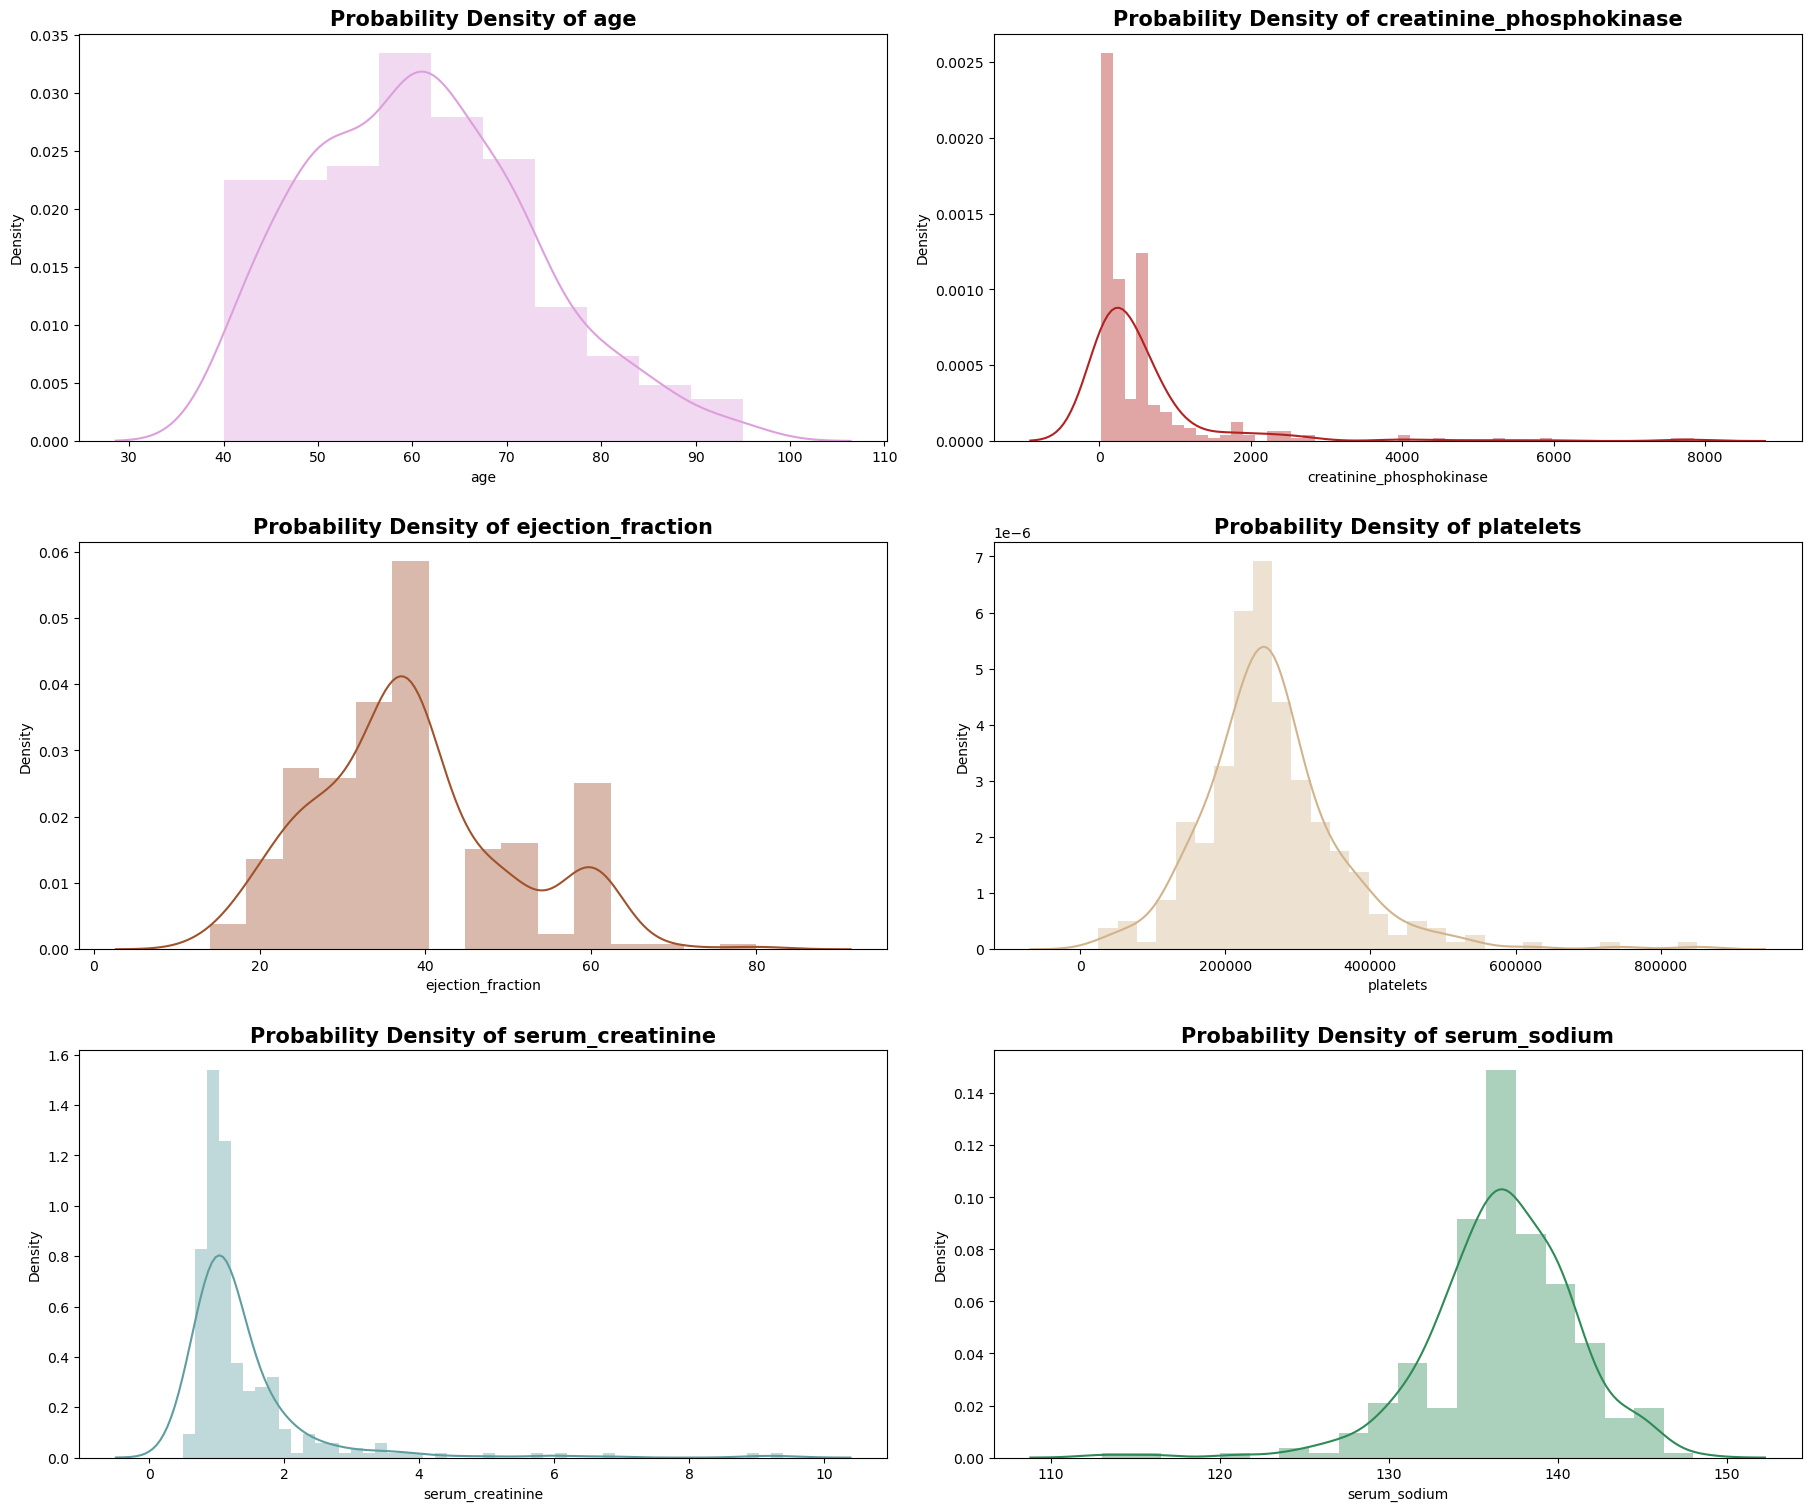

In [16]:
fig, ax = plt.subplots(3,2, figsize=(18,15), constrained_layout=True)

# age
sns.distplot(df_fitur['age'], ax=ax[0,0], color='plum')
ax[0,0].set_title("Probability Density of age", fontsize=15, fontweight='bold')

# creatinine_phosphokinase
sns.distplot(df_fitur['creatinine_phosphokinase'], ax=ax[0,1], color='firebrick')
ax[0,1].set_title("Probability Density of creatinine_phosphokinase", fontsize=15, fontweight='bold')

# ejection_fraction
sns.distplot(df_fitur['ejection_fraction'], ax=ax[1,0], color='sienna')
ax[1,0].set_title("\nProbability Density of ejection_fraction", fontsize=15, fontweight='bold')

# platelets
sns.distplot(df_fitur['platelets'], ax=ax[1,1], color='tan')
ax[1,1].set_title("\nProbability Density of platelets", fontsize=15, fontweight='bold')

# serum_creatinine
sns.distplot(df_fitur['serum_creatinine'], ax=ax[2,0], color='cadetblue')
ax[2,0].set_title("\nProbability Density of serum_creatinine", fontsize=15, fontweight='bold')

# serum_sodium
sns.distplot(df_fitur['serum_sodium'], ax=ax[2,1], color='seagreen')
ax[2,1].set_title("\nProbability Density of serum_sodium", fontsize=15, fontweight='bold');

**Kesimpulan:** <br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- `age` : tidak berdistribusi normal karena terdapat banyak puncak dalam grafik distribusi variabel 'age' dan sebagian besar terdistribusi sebagai nilai antara 60-65, 65-70, dan 70-75
- `creatinine_phosphokinase` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `ejection_fraction` : tidak berdistribusi normal karena data condong ke kiri (positively skewed) dan terdapat data yang kosong antara nilai 40-45
- `platelets` : berdistribusi normal karena grafik tidak memiliki banyak puncak, kemiringan dan kurtosis rendah serta sebagian besar terdistribusi antara 200000 dan 400000
- `serum_creatinine` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `serum_sodium` : tidak berdistribusi normal karena data condong ke kanan (negatively skewed)

### 4. Berapa pasien penderita diabetes terbanyak berdasarkan usia dan gender? 

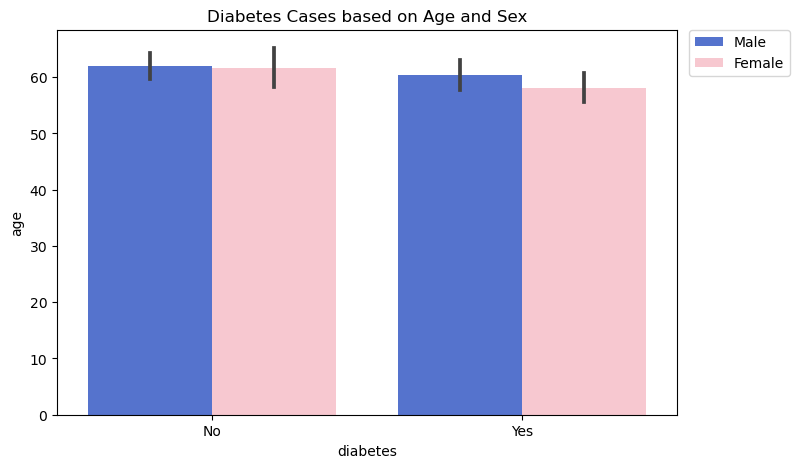

In [17]:
plt.figure(figsize=(8,5))

ax = sns.barplot(x = 'diabetes', y = 'age', hue = 'sex', 
            data = df_fitur, palette = ['royalblue', 'pink']).set(title = "Diabetes Cases based on Age and Sex");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Kesimpulan:**

Berdasarkan visualisasi diatas, dapat diketahui bahwa pasien penderita diabetes terbanyak berdasarkan usia dan gender yaitu pada pasien laki-laki yang berusia 60 tahun. Selain itu, pasien perempuan penderita diabetes terbanyak berusia sekitar 58 tahun.

### 5. Bagaimana perbandingan waktu untuk follow-up dengan kematian pasien?

In [42]:
fig = px.histogram(df, x="time", color="DEATH_EVENT", marginal="box", hover_data=df.columns)
fig.show()

**Kesimpulan:**<br> 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:
- Pasien meninggal terbanyak selama masa follow-up yaitu pada hari ke 20-39 dengan total kasus 22 kematian
- Pasien meninggal paling sedikit selama masa follow-up yaitu pada hari ke 220-239 dan 240-259 dengan total kasus 1 kematian
- Masa follow-up pada hari ke 80-99 terdapat pasien berhasil bertahan hidup paling banyak dengan total 30 kasus 
- Masa follow-up pada hari ke 280-299 terdapat pasien berhasil bertahan hidup paling sedikit dengan total 2 kasus 

### 6. Pada pasien berusia berapa terdapat kasus penderita anaemia paling banyak?

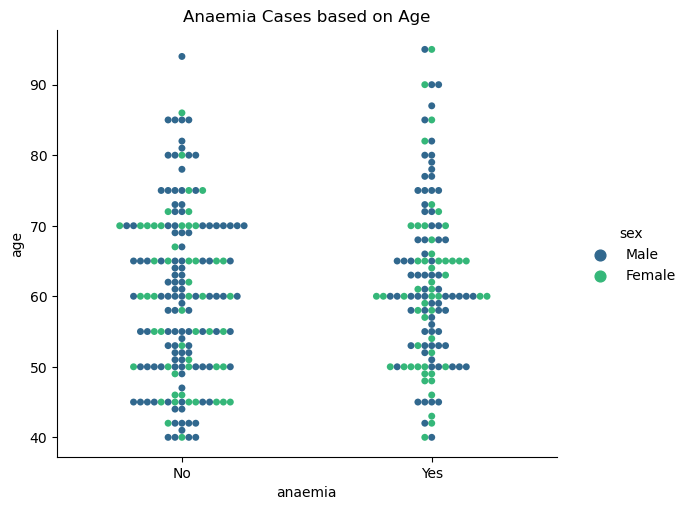

In [18]:
sns.catplot(x = 'anaemia', y = 'age', hue='sex',
            data = df_fitur,
            kind = 'swarm', height = 5, aspect = 1.2, palette = 'viridis', 
            margin_titles = True).set(title = "Anaemia Cases based on Age");

**Kesimpulan:**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:
- Penderita anaemia terbanyak yaitu pada pasien berusia 60 tahun dengan total 17 kasus (7 pasien perempuan dan 10 pasien laki-laki)
- Pasien yang berusia 70 tahun sebagian besar tidak menderita kasus anaemia

### 7. Bagaimana hubungan antara categorikal feature dengan kematian pasien?

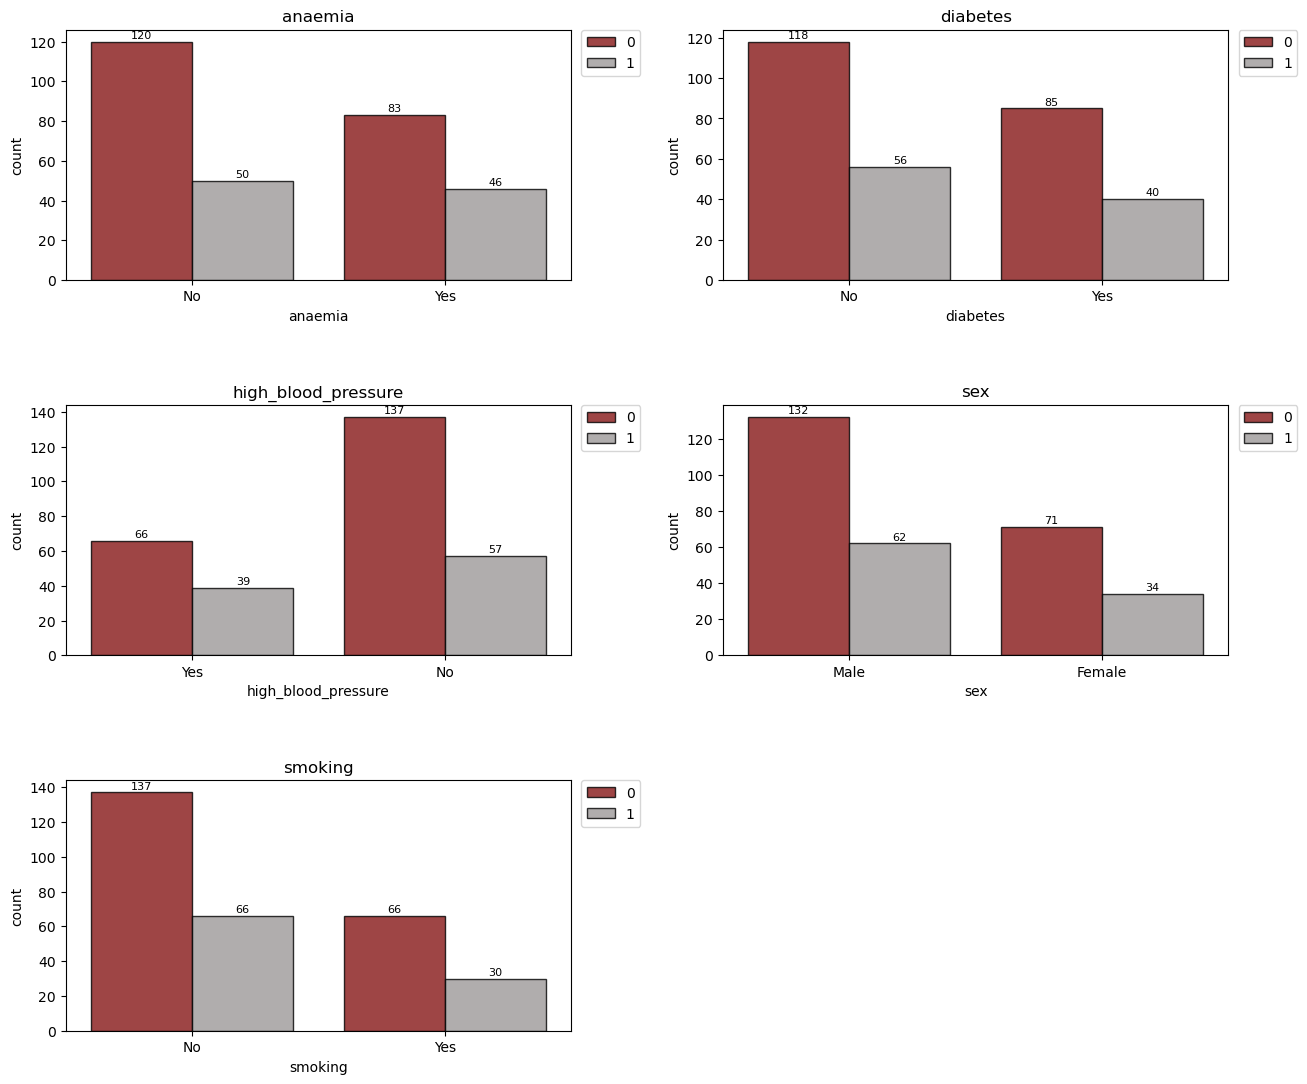

In [58]:
plt.figure(figsize=(15, 13))

for i, col in enumerate(categorical):
    plt.subplot(3, 2, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    bar = sns.countplot(data=df_fitur, x=col, hue="DEATH_EVENT", 
                        palette = ["#990303", "#9C9999"], 
                        alpha=0.8, edgecolor="k", linewidth=1)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
    for a in bar.containers:
        bar.bar_label(a, fmt='%.0f', label_type='edge', padding=1, fontsize=8)

**Kesimpulan:**<br> 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:
- Kasus kematian pada pasien yang menderita anaemia yaitu 46 kasus, sedangkan pada pasien yang tidak menderita anaemia yaitu 50 kasus. Artinya penderita anaemia belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita diabetes yaitu 40 kasus, sedangkan pada pasien yang tidak menderita diabetes yaitu 56 kasus. Artinya penderita diabetes belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita darah tinggi yaitu 39 kasus, sedangkan pada pasien yang tidak menderita darah tinggi yaitu 57 kasus. Artinya penderita darah tinggi belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Pasien berjenis kelamin laki-laki lebih banyak tingkat kematiannya. Kasus kematian pada pasien dengan jenis kelamin laki-laki yaitu 62 kasus, sedangkan pada pasien dengan jenis kelamin perempuan yaitu 34 kasus
- Kasus kematian pada pasien yang merokok yaitu 30 kasus, sedangkan pada pasien yang tidak merokok yaitu 66 kasus. Artinya perokok belum tentu menjadi penyebab kematian pada pasien gagal jantung

## E.3. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

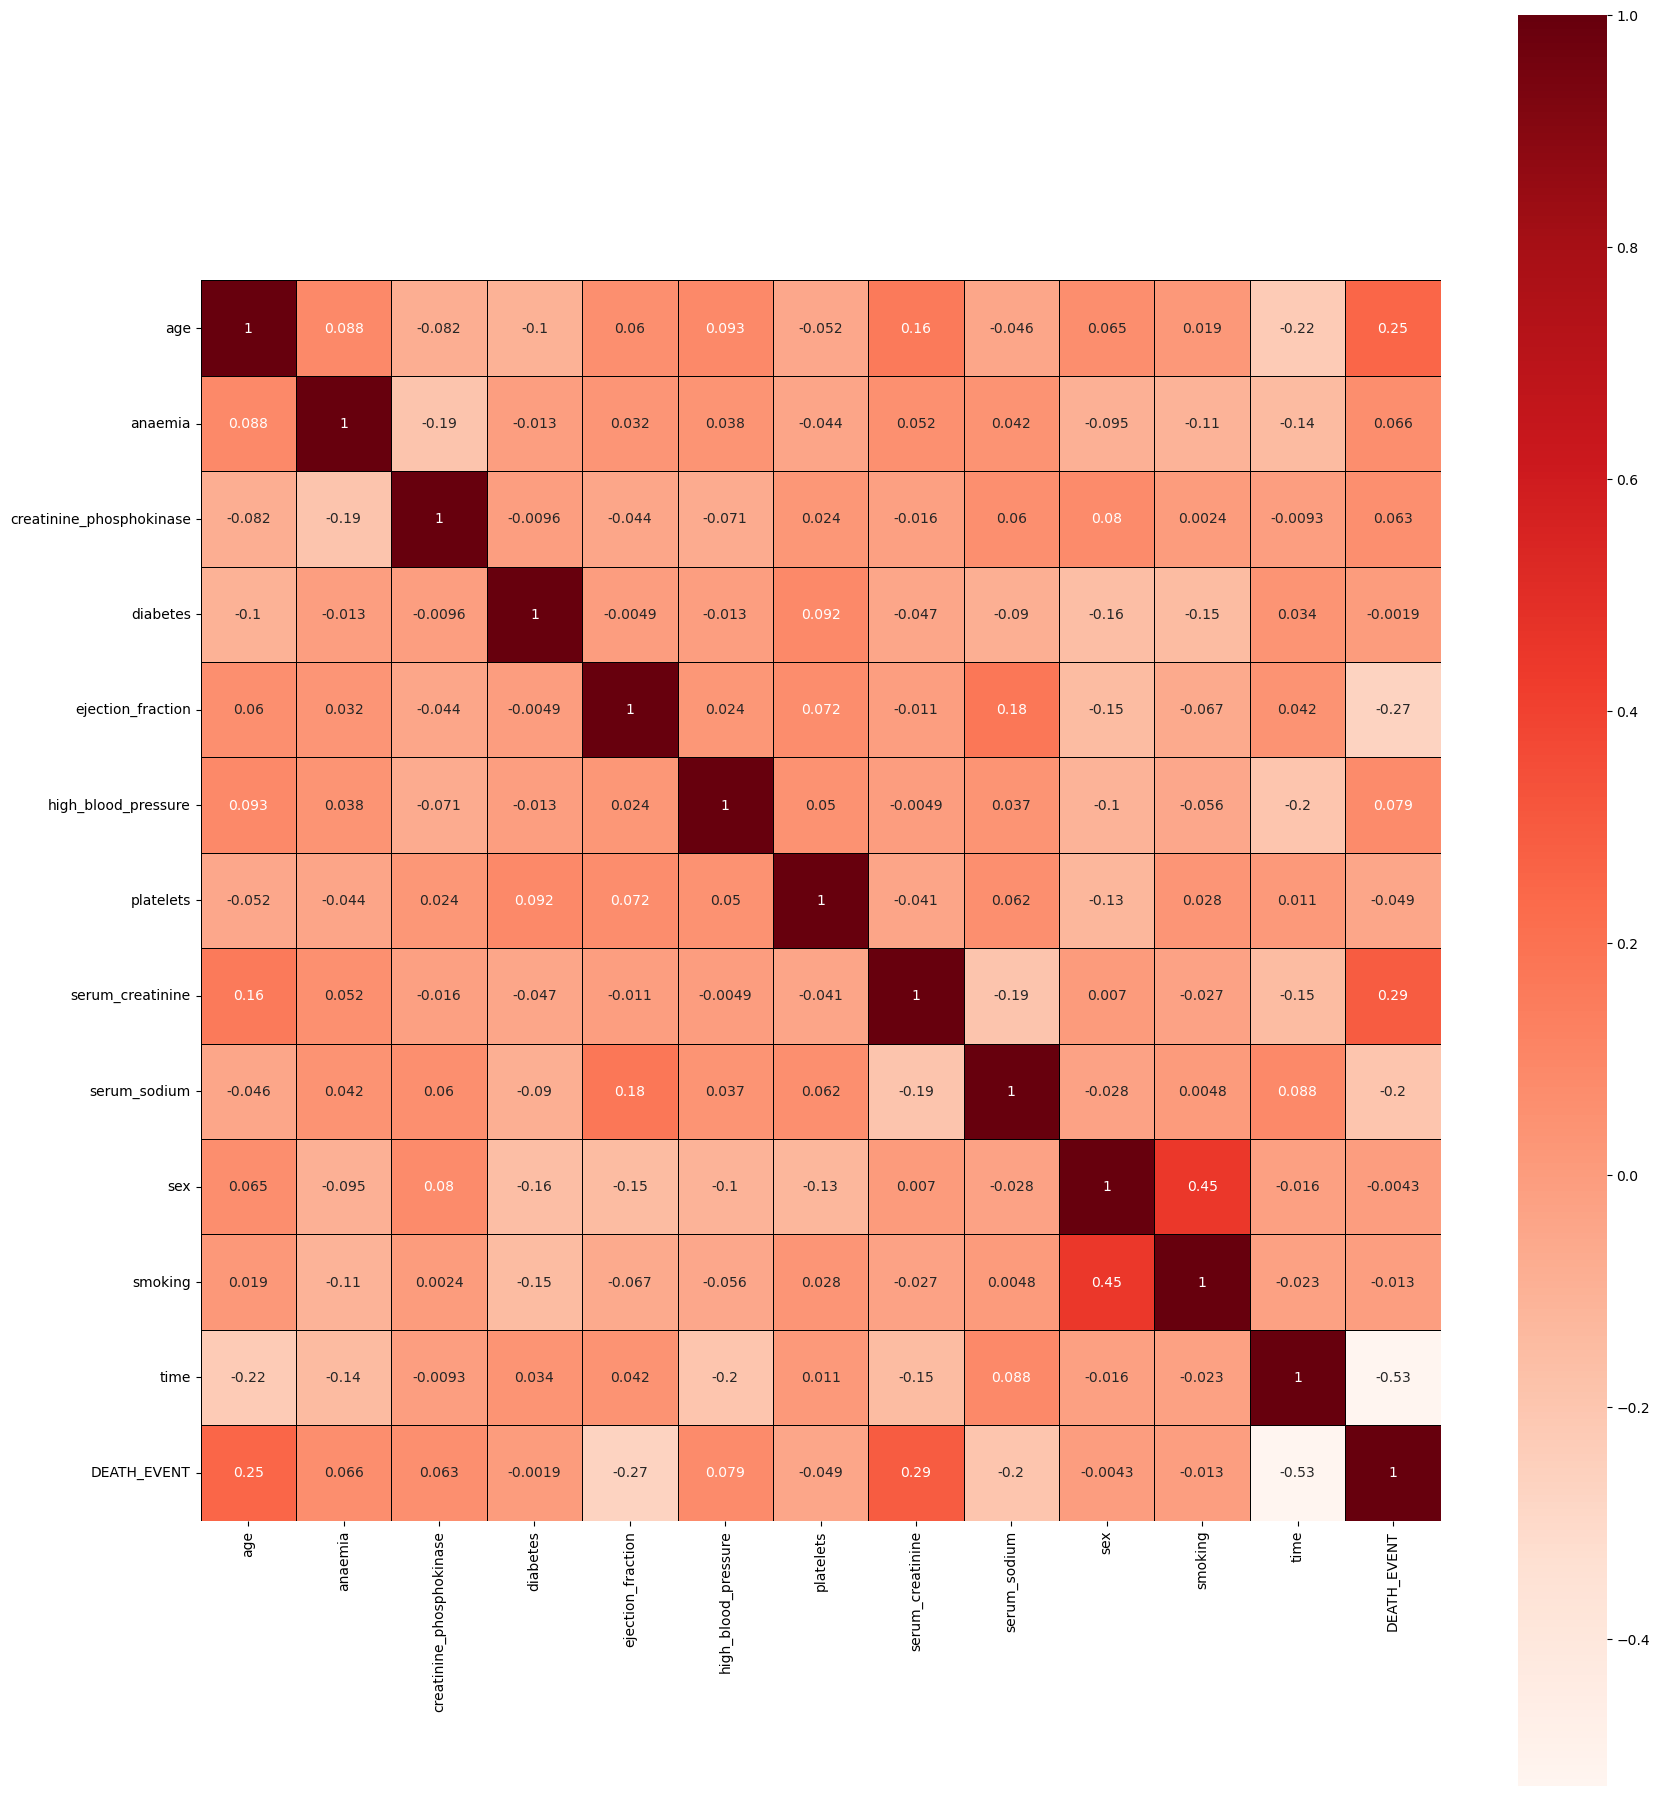

In [19]:
plt.figure(figsize=(20,23)) 
    
# Membuat heatmap dengan menampilkan nilai dari korelasi
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="Reds", 
            linewidths=.5, 
            linecolor='black', 
            square=True); 

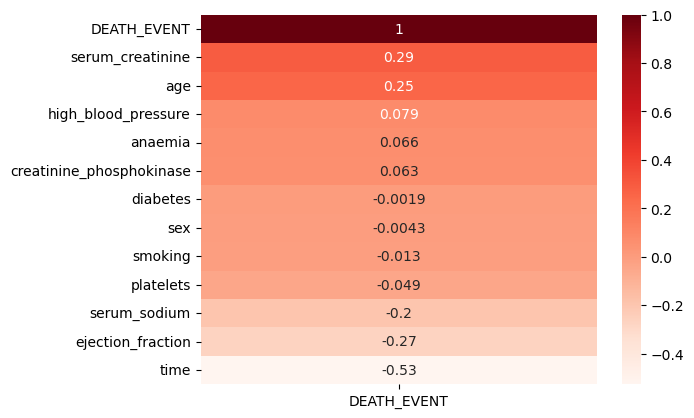

In [20]:
corr = df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False)
sns.heatmap(corr, annot=True, cmap="Reds");

**Keterangan:**
Berdasarkan visualisasi heatmap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom `DEATH_EVENT` yang kemudian nantinya digunakan untuk variabel X pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `serum_creatinine`, dengan korelasi sebesar 0.29
2. `age`, dengan korelasi sebesar 0.25
3. `high_blood_pressure`, dengan korelasi sebesar 0.079
4. `anaemia`, dengan korelasi sebesar 0.066
5. `creatinine_phosphokinase`, dengan korelasi sebesar 0.063
6. `diabetes`, dengan korelasi sebesar -0.0019
7. `sex`, dengan korelasi sebesar -0.0043
8. `smoking`, dengan korelasi sebesar -0.013
7. `platelets`, dengan korelasi sebesar -0.049

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [21]:
df_central = df_fitur.loc[:,['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
df_central.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   65                       160                 20  327000.00   

   serum_creatinine  serum_sodium  time  
0               1.9           130     4  
1               1.1           136     6  
2               1.3           129     7  
3               1.9           137     7  
4               2.7           116     8

In [22]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: age
Mean: 60.836
Median: 60.000
Modus: 60.000
Range: 55.000
Variansi: 141.486
Standard Deviasi: 11.895
  
Nama Kolom: creatinine_phosphokinase
Mean: 581.839
Median: 250.000
Modus: 582.000
Range: 7838.000
Variansi: 941458.571
Standard Deviasi: 970.288
  
Nama Kolom: ejection_fraction
Mean: 38.084
Median: 38.000
Modus: 35.000
Range: 66.000
Variansi: 140.063
Standard Deviasi: 11.835
  
Nama Kolom: platelets
Mean: 263358.029
Median: 262000.000
Modus: 263358.030
Range: 824900.000
Variansi: 9565668749.449
Standard Deviasi: 97804.237
  
Nama Kolom: serum_creatinine
Mean: 1.394
Median: 1.100
Modus: 1.000
Range: 8.900
Variansi: 1.070
Standard Deviasi: 1.035
  
Nama Kolom: serum_sodium
Mean: 136.625
Median: 137.000
Modus: 136.000
Range: 35.000
Variansi: 19.470
Standard Deviasi: 4.412
  
Nama Kolom: time
Mean: 130.261
Median: 115.000
Modus: 187.000
Range: 281.000
Variansi: 6023.965
Standard Deviasi: 77.614
  


# G. Cardinality
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [23]:
df_card = df.loc[:,['serum_creatinine', 'age', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'sex', 'smoking', 'platelets', 'DEATH_EVENT']]
df_card.head()

serum_creatinine  age  high_blood_pressure  anaemia  \
0               1.9   75                    1        0   
1               1.1   55                    0        0   
2               1.3   65                    0        0   
3               1.9   50                    0        1   
4               2.7   65                    0        1   

   creatinine_phosphokinase  diabetes  sex  smoking  platelets  DEATH_EVENT  
0                       582         0    1        0  265000.00            1  
1                      7861         0    1        0  263358.03            1  
2                       146         0    1        1  162000.00            1  
3                       111         0    1        0  210000.00            1  
4                       160         1    0        0  327000.00            1

In [24]:
print('Number of categories in the variable serum_creatinine         : {}'.format(len(df.serum_creatinine.unique())))
print('Number of categories in the variable age                      : {}'.format(len(df.age.unique())))
print('Number of categories in the variable high_blood_pressure      : {}'.format(len(df.high_blood_pressure.unique())))
print('Number of categories in the variable anaemia                  : {}'.format(len(df.anaemia.unique())))
print('Number of categories in the variable creatinine_phosphokinase : {}'.format(len(df.creatinine_phosphokinase.unique())))
print('Number of categories in the variable diabetes                 : {}'.format(len(df.diabetes.unique())))
print('Number of categories in the variable sex                      : {}'.format(len(df.sex.unique())))
print('Number of categories in the variable smoking                  : {}'.format(len(df.smoking.unique())))
print('Number of categories in the variable platelets                : {}'.format(len(df.platelets.unique())))
print('Number of categories in the variable DEATH_EVENT              : {}'.format(len(df.DEATH_EVENT.unique())))

Number of categories in the variable serum_creatinine         : 40
Number of categories in the variable age                      : 46
Number of categories in the variable high_blood_pressure      : 2
Number of categories in the variable anaemia                  : 2
Number of categories in the variable creatinine_phosphokinase : 208
Number of categories in the variable diabetes                 : 2
Number of categories in the variable sex                      : 2
Number of categories in the variable smoking                  : 2
Number of categories in the variable platelets                : 176
Number of categories in the variable DEATH_EVENT              : 2


**Keterangan:**

Dapat dilihat bahwa number of categories (unique value) dari creatinine_phosphokinase dan platelets sangat banyak atau biasa disebut dengan istilah high cardinality. Namun, dikarenakan creatinine_phosphokinase merupakan level enzim CPK dalam mcg/L dan platelets merupakan jumlah platelet di darah dalam kiloplatelets/mL maka tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality.

# H. One Hot Encoding

In [25]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [26]:
# Melakukan copy dataframe df menjadi df_onehot
df_onehot = df_fitur.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot = one_hot_encoder(df_onehot, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot
df_onehot.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   65                       160                 20  327000.00   

   serum_creatinine  serum_sodium  time  DEATH_EVENT  anaemia_No  anaemia_Yes  \
0               1.9           130     4            1           1            0   
1               1.1           136     6            1           1            0   
2               1.3           129     7            1           1            0   
3               1.9           137     7            1           0            1   
4               2.7           116     8            1           0            1   

   diabetes_No  diabetes_Yes  high_blood_pressure_No  high_blood_pressure_Yes  \
0            1             0                       0                        1   
1            1             0                       1                        0   
2            1             0                       1                        0   
3            1             0                       1                        0   
4            0             1                       1                        0   

   sex_Female  sex_Male  smoking_No  smoking_Yes  
0           0         1           1            0  
1           0         1           1            0  
2           0         1           0            1  
3           0         1           1            0  
4           1         0           1            0

# I. Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMax Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [27]:
# memisahkan variabel dependen dan independen pada data training dan testing
x = df_onehot.drop(['DEATH_EVENT'],axis=1)
y = df_onehot['DEATH_EVENT']

In [28]:
x = MinMaxScaler().fit_transform(x)

# J. Analisis
Pada tahap ini berisi kondisi yang kami buat dengan tujuan untuk memaksimalkan hasil modelling nanti beserta tahapan-tahapan lainnya agar kondisi-kondisi tersebut semakin optimal. Diantaranya adalah mengindentifikasi data, menghandle outliers, dan menghitung nilai kuartil.

## J.1. Kondisi 
Memilih kolom dengan korelasi paling tinggi berdasarkan analisis korelasi yang telah dilakukan. Kolom yang dipilih sudah melalui proses encoding, undersampling dan feature scaling.

In [29]:
df_kondisi = df_onehot.copy()
df_kondisi.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   65                       160                 20  327000.00   

   serum_creatinine  serum_sodium  time  DEATH_EVENT  anaemia_No  anaemia_Yes  \
0               1.9           130     4            1           1            0   
1               1.1           136     6            1           1            0   
2               1.3           129     7            1           1            0   
3               1.9           137     7            1           0            1   
4               2.7           116     8            1           0            1   

   diabetes_No  diabetes_Yes  high_blood_pressure_No  high_blood_pressure_Yes  \
0            1             0                       0                        1   
1            1             0                       1                        0   
2            1             0                       1                        0   
3            1             0                       1                        0   
4            0             1                       1                        0   

   sex_Female  sex_Male  smoking_No  smoking_Yes  
0           0         1           1            0  
1           0         1           1            0  
2           0         1           0            1  
3           0         1           1            0  
4           1         0           1            0

In [30]:
df_kondisi['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### J.1.1. Mengidentifikasi data apakah berdistribusi normal atau skewness

In [31]:
# Membuat fungsi untuk visualisasi histogram dan boxplot dengan 2 parameter
def diagnostic_plots(df_kondisi, variable):
    # Mengatur ukuran
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_kondisi[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_kondisi[variable])
    plt.title('Boxplot')

    plt.show()

In [32]:
select = df_kondisi[['DEATH_EVENT']]
select.head()

DEATH_EVENT
0            1
1            1
2            1
3            1
4            1

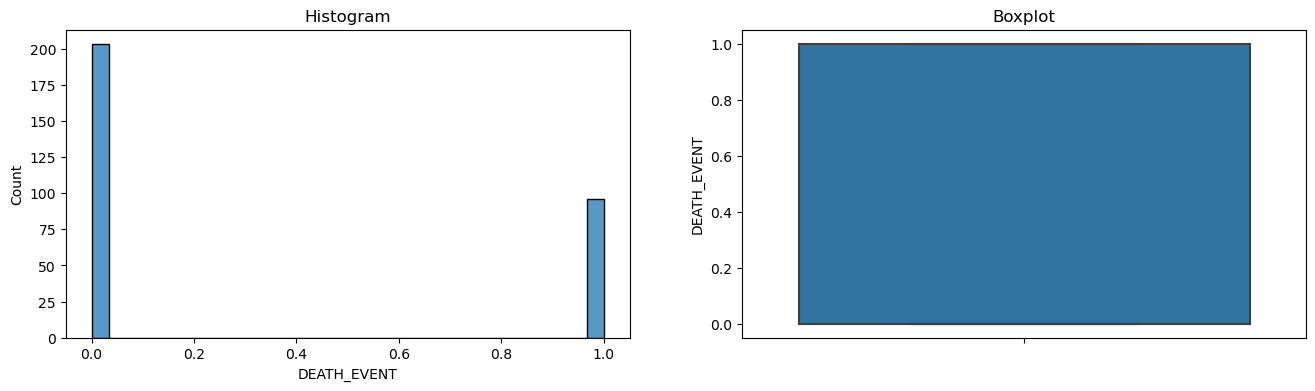

Skewness Value :  0.7703488154389491


In [33]:
diagnostic_plots(select, 'DEATH_EVENT')
print('Skewness Value : ', select['DEATH_EVENT'].skew())

Ternyata data tersebut memiliki Skewness Value yang relatif kecil yaitu sebesar 0.78, selanjutnya yaitu mengecek apakah ada outlier pada kolom DEATH_EVENTS

### J.1.2. Outliers

In [34]:
# Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['DEATH_EVENT']  
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))
        if drop:
            df_undersampling.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [35]:
outliers(df_kondisi[continous_features])

Pada kolom DEATH_EVENT, jumlah outliernya adalah 0


Ternyata tidak ada outlier pada kolom DEATH_EVENTS, selanjutnya yaitu menghitung kuartil

### J.1.3. Menghitung nilai kuartil

In [36]:
# Menghitung kuartil 1 (Q1) dari kolom 'RainTomorrow' dalam df_kondisi dan menyimpannya dalam variabel Q1
Q1 = df_kondisi['DEATH_EVENT'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) dari kolom 'RainTomorrow' dalam df_kondisi dan menyimpannya dalam variabel Q3
Q3 = df_kondisi['DEATH_EVENT'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) dari kolom 'RainTomorrow' dalam df_kondisi dan menyimpannya dalam variabel IQR
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  0.0
Nilai Kuartil 3 :  1.0
Nilai Rentang :  1.0


#### J.1.3.1. Melakukan filtering pada df_kondisi berdasarkan kondisi yang diberikan 
- Kondisi adalah nilai kolom 'DEATH_EVENT' harus lebih besar dari (Q3+(1.5 * IQR)) <br>
- Angka 1.5 dalam rumus (Q3+(1.5 * IQR)) atau (Q1-(1.5 * IQR)) adalah nilai yang digunakan dalam metode IQR (Interquartile Range) untuk mengidentifikasi outlier.

In [37]:
df_kondisi[df_kondisi['DEATH_EVENT'] > (Q3 + (1.5 * IQR))].head()

Empty DataFrame
Columns: [age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time, DEATH_EVENT, anaemia_No, anaemia_Yes, diabetes_No, diabetes_Yes, high_blood_pressure_No, high_blood_pressure_Yes, sex_Female, sex_Male, smoking_No, smoking_Yes]
Index: []

#### J.1.3.2. Melakukan filtering pada df_kondisi berdasarkan kondisi yang diberikan
Kondisi adalah nilai kolom 'DEATH_EVENT' harus kurang dari (Q1 - (1.5 * IQR))

In [38]:
df_kondisi[df_kondisi['DEATH_EVENT'] < (Q1 - (1.5 * IQR))]

Empty DataFrame
Columns: [age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time, DEATH_EVENT, anaemia_No, anaemia_Yes, diabetes_No, diabetes_Yes, high_blood_pressure_No, high_blood_pressure_Yes, sex_Female, sex_Male, smoking_No, smoking_Yes]
Index: []

In [39]:
df_kondisi.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   65                       160                 20  327000.00   

   serum_creatinine  serum_sodium  time  DEATH_EVENT  anaemia_No  anaemia_Yes  \
0               1.9           130     4            1           1            0   
1               1.1           136     6            1           1            0   
2               1.3           129     7            1           1            0   
3               1.9           137     7            1           0            1   
4               2.7           116     8            1           0            1   

   diabetes_No  diabetes_Yes  high_blood_pressure_No  high_blood_pressure_Yes  \
0            1             0                       0                        1   
1            1             0                       1                        0   
2            1             0                       1                        0   
3            1             0                       1                        0   
4            0             1                       1                        0   

   sex_Female  sex_Male  smoking_No  smoking_Yes  
0           0         1           1            0  
1           0         1           1            0  
2           0         1           0            1  
3           0         1           1            0  
4           1         0           1            0

# K. Modelling
## K.1. 

### K.1.1. Pendefinisian Model
Mendefinisikan model 

In [40]:
# Memisahkan data menjadi data training dan data testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=0)

### K.1.2. Pelatihan Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

### K.1.3. Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. 

#### K.1.3.1. Mencari nilai akurasi dan classification report

## K.2. 
### K.2.1. Pendefinisian Model
Mendefinisikan model 

### K.2.2. Pelatihan Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

### K.2.3. Evaluasi Model
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. 

# L. Model Improvement

# M. Model Inference

# N. Kesimpulan

___